In [1]:
import pandas as pd
import numpy as np



In [2]:
# Cargar el dataset
df = pd.read_csv("train.csv")
df


,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.00
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,449.00
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1460.00
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,1713.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,89,973,Acer,Chromebook C738T-C2EJ,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25kg,389.00
908,716,1018,Toshiba,Portege Z30-C-16H,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.2kg,1195.00
909,517,1071,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,8GB,1TB HDD,AMD Radeon R5,Windows 10,2.4kg,449.00
910,891,965,Dell,Latitude 7480,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.36kg,1775.00


In [3]:
# Información general
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB
None


In [4]:
# Estadísticas descriptivas
print(df.describe())

                id    laptop_ID      Inches  Price_euros
count   912.000000   912.000000  912.000000   912.000000
mean    645.091009   666.192982   15.011404  1108.122873
std     380.313813   384.873846    1.411744   714.597741
min       0.000000     1.000000   10.100000   174.000000
25%     319.750000   330.500000   14.000000   589.000000
50%     636.500000   673.500000   15.600000   949.000000
75%     980.250000   998.500000   15.600000  1458.500000
max    1302.000000  1320.000000   18.400000  6099.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


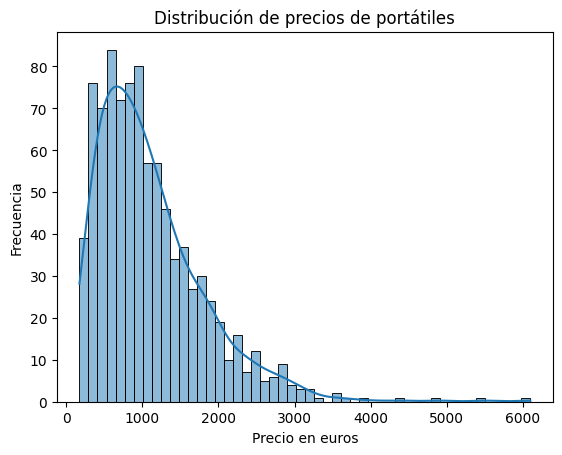

In [6]:
# Histograma de precios
sns.histplot(df["Price_euros"], bins=50, kde=True)
plt.xlabel("Precio en euros")
plt.ylabel("Frecuencia")
plt.title("Distribución de precios de portátiles")
plt.show()


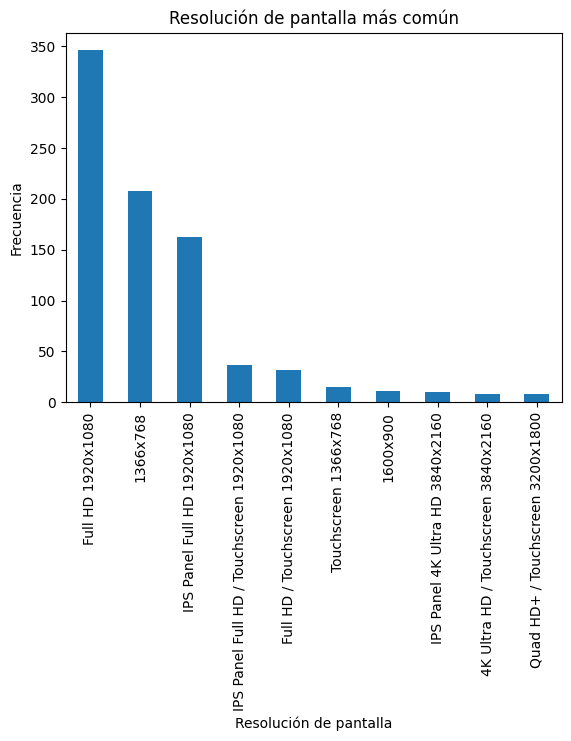

In [7]:
df["ScreenResolution"].value_counts().head(10).plot(kind='bar')
plt.xlabel("Resolución de pantalla")    
plt.ylabel("Frecuencia")
plt.title("Resolución de pantalla más común")
plt.show()
# Gráfico de barras de marcas más comunes

# EVALUACIÓN DEL DATASET:
De acuerdo a lo observado, gran parte de las variables son de tipo object, lo que nos motiva a evaluar el dataset y considerar transformar, de acuerdo a su naturaleza, las variables que sean susceptibles de ser transformadas en numéricas.

In [8]:
# Entre las variables que intentaremos trasnformar están:
# Weight, Ram, y Memory

# Transformación de Weight (Simplmente eliminamos la unidad kg y convertimos a float)
df["Weight_kg"] = df["Weight"].str.replace("kg", "").astype(float)

# Transformación de RAM 
df["Ram_GB"] = df["Ram"].str.replace("GB", "").astype(int)



In [12]:
# Transformación de Memory a un formato numérico más manejable
# Primero, vamos a ver cómo están representados los datos de Memory
df["Memory"].unique()

array(['1TB HDD', '256GB SSD', '256GB SSD +  1TB HDD',
       '512GB SSD +  2TB HDD', '128GB SSD +  1TB HDD', '128GB SSD',
       '1TB SSD', '64GB Flash Storage', '2TB HDD', '500GB HDD',
       '1.0TB Hybrid', '16GB Flash Storage', '256GB Flash Storage',
       '180GB SSD', '32GB Flash Storage', '512GB SSD',
       '512GB SSD +  1TB HDD', '256GB SSD +  500GB HDD',
       '256GB SSD +  2TB HDD', '1TB SSD +  1TB HDD', '64GB SSD',
       '128GB Flash Storage', '256GB SSD +  1.0TB Hybrid', '32GB SSD',
       '512GB Flash Storage', '240GB SSD', '256GB SSD +  256GB SSD',
       '16GB SSD', '8GB SSD', '64GB Flash Storage +  1TB HDD',
       '1.0TB HDD', '1TB HDD +  1TB HDD', '512GB SSD +  512GB SSD',
       '128GB SSD +  2TB HDD', '32GB HDD', '512GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [13]:
# Dado que puede haber múltiples unidades de almacenamiento (GB/TB), 
# vamos a crear una nueva variable que agrupe todo en GB.
import re

# Función para convertir Memory en GB
def convert_memory(memory):
    # Separar múltiples unidades de almacenamiento
    parts = memory.split(" + ")
    total_gb = 0
    
    for part in parts:
        # Extraer el número y la unidad (GB/TB)
        match = re.search(r'(\d+\.?\d*)(TB|GB)', part)
        if match:
            size, unit = float(match.group(1)), match.group(2)
            if unit == "TB":
                size *= 1000  # Convertir TB a GB
            total_gb += size
    
    return total_gb

# Aplicar la función al dataset y crear la nueva variable
df["Memory_GB"] = df["Memory"].apply(convert_memory)

# Mostrar resultados
print(df[["Memory", "Memory_GB"]].head())


# Verificamos que los datos se transformaron correctamente
print(df[["Weight", "Weight_kg", "Ram", "Ram_GB", "Memory", "Memory_GB"]].head())

                 Memory  Memory_GB
0               1TB HDD     1000.0
1               1TB HDD     1000.0
2             256GB SSD      256.0
3  256GB SSD +  1TB HDD     1256.0
4             256GB SSD      256.0
   Weight  Weight_kg   Ram  Ram_GB                Memory  Memory_GB
0  2.36kg       2.36   8GB       8               1TB HDD     1000.0
1     2kg       2.00   4GB       4               1TB HDD     1000.0
2   1.2kg       1.20   8GB       8             256GB SSD      256.0
3  4.42kg       4.42  16GB      16  256GB SSD +  1TB HDD     1256.0
4  1.26kg       1.26   8GB       8             256GB SSD      256.0


In [14]:
#Intentaremos transformar la variable ScreenResolution a un formato más manejable.
# Verificamos los valores únicos de ScreenResolution
df["ScreenResolution"].unique()    

array(['1366x768', 'Full HD 1920x1080', 'IPS Panel 4K Ultra HD 3840x2160',
       'Full HD / Touchscreen 1920x1080', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'IPS Panel Touchscreen 1920x1200',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Retina Display 2880x1800', 'IPS Panel 1366x768',
       'IPS Panel Quad HD+ / Touchscreen 3200x1800',
       'Quad HD+ / Touchscreen 3200x1800', '4K Ultra HD 3840x2160',
       'IPS Panel 2560x1440', '1600x900', 'Touchscreen 2560x1440',
       'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel Retina Display 2304x1440', '1440x900',
       'IPS Panel Retina Display 2560x1600', 'Touchscreen 2256x1504',
       '2560x1440', 'IPS Panel Touchscreen / 4K Ultra HD 3840x2160',
       'IPS Panel Touchscreen 2560x1440', '1920x1080',
       'Touchscreen 2400x1600', 'IPS Panel Full HD 2160x1440',
       'Quad HD+ 3200x1800',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x21

### Características que contiene de forma conjunta la variable resolución.

- IPS es una tecnología de panel caracterizada por usar cristales líquidos alineados en paralelo que se intercalan entre 2 superficies de vidrio. Sus siglas significa "In-Plane Switching"
- La resolución Full HD, también conocida como FHD o 1080p, es una de las resoluciones más populares en la actualidad.
- Comenzaremos por la resolución HD, que significa Alta Definición. La resolución HD se refiere a una resolución de 1280x720 píxeles
- QHD: cuatro veces la resolución HD
La resolución QHD, también conocida como Quad HD o 2K, ofrece cuatro veces la resolución del HD estándar.
- UHD: Ultra alta definición
La resolución UHD, también conocida como Ultra Alta Definición o 4K, es la última evolución en calidad de imagen. Se refiere a una resolución de 3840x2160 píxeles, lo que significa que la pantalla tiene 3840 píxeles en el eje horizontal y 2160 píxeles en el eje vertica
- 4K: el estándar actual más común y de mejor calidad
El término 4K se utiliza comúnmente para referirse a la resolución UHD, ya que tiene aproximadamente 4000 píxeles en el eje horizontal.


### Notas de Comentario
Tenoendo en cuenta las diversas características que están de forma conjunta en la resolución, es conveniente hacer una mayor distinción en los tipos de resolución creando variables por separado para cada característica adicional a la dimensión de la resolución en si misma, es decir: Hd, Full HD, 4K, Quad , IPS Panel, Touchscreen.

Separar estas características o propiedades adicionales de la resolución en variables independientes nos permitirá capturar mejor el impacto de cada tecnología en el precio. Esto nos dará más flexibilidad al analizar cada factor por separado.. Sin embargo, en aras de explorar los posibles modelos, haremos pruebas tanto con la variable y sus características en resolución por separado y en conjunto. Dicho lo anterior:

Vamos a crear variables binarias (0 o 1) que representen la presencia de cada característica:
- HD (1 si la resolución es 1366x768 o 1600x900, 0 en caso contrario)
- Full HD (1920x1080)
- Quad HD+ (2560x1440 y 3200x1800)
- 4K Ultra HD (3840x2160)
- IPS Panel (Si contiene "IPS Panel" en el nombre)
- Touchscreen (Si contiene "Touchscreen")

In [15]:
# Crear variables binarias para cada tipo de resolución
df["HD"] = df["ScreenResolution"].apply(lambda x: 1 if "1366x768" in x or "1600x900" in x else 0)
df["Full_HD"] = df["ScreenResolution"].apply(lambda x: 1 if "1920x1080" in x else 0)
df["Quad_HD"] = df["ScreenResolution"].apply(lambda x: 1 if "2560x1440" in x or "3200x1800" in x else 0)
df["Ultra_HD_4K"] = df["ScreenResolution"].apply(lambda x: 1 if "3840x2160" in x else 0)
df["IPS_Panel"] = df["ScreenResolution"].apply(lambda x: 1 if "IPS Panel" in x else 0)
df["Touchscreen"] = df["ScreenResolution"].apply(lambda x: 1 if "Touchscreen" in x else 0)

# Verificamos los resultados
print(df[["ScreenResolution", "HD", "Full_HD", "Quad_HD", "Ultra_HD_4K", "IPS_Panel", "Touchscreen"]].head())


                  ScreenResolution  HD  Full_HD  Quad_HD  Ultra_HD_4K  \
0                         1366x768   1        0        0            0   
1                         1366x768   1        0        0            0   
2                Full HD 1920x1080   0        1        0            0   
3  IPS Panel 4K Ultra HD 3840x2160   0        0        0            1   
4  Full HD / Touchscreen 1920x1080   0        1        0            0   

   IPS_Panel  Touchscreen  
0          0            0  
1          0            0  
2          0            0  
3          1            0  
4          0            1  


Está claro que  no hay una relación lienal en tendencia respecto del precio y la resolución si consideramos la variable que muestra con todas sus características conjuntas. Podrían ser diversas las razones, es por ello que, haremos pruebas con la variable conjunta y las variables que hemos creado.

In [17]:
import statsmodels.api as sm


In [16]:
df.columns

Index(['id', 'laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros', 'Weight_kg', 'Ram_GB', 'Memory_GB', 'HD', 'Full_HD',
       'Quad_HD', 'Ultra_HD_4K', 'IPS_Panel', 'Touchscreen'],
      dtype='object')

In [18]:
def clasificar_segmento(modelo):
    modelo = modelo.lower()
    if any(marca in modelo for marca in ['thinkpad', 'elitebook', 'probook', 'latitude', 'portege', 'tecra', 'lifebook']):
        return "Empresarial"
    elif any(marca in modelo for marca in ['inspiron', 'vivobook', 'zenbook', 'ideapad', 'aspire']):
        return "Consumo general"
    elif any(marca in modelo for marca in ['alienware', 'rog', 'omen', 'predator', 'legion', 'zbook', 'precision', 'msi']):
        return "Alto rendimiento / Gaming"
    elif any(marca in modelo for marca in ['xps', 'yoga', 'spectre', 'swift', 'surface']):
        return "Ultrabook / Convertible"
    elif 'chromebook' in modelo:
        return "Educación / ChromeOS"
    else:
        return "Otro / Indefinido"

# Función para detectar sistema operativo (si aparece mencionado)
def clasificar_sistema(modelo):
    modelo = modelo.lower()
    if 'linux' in modelo:
        return "Linux"
    elif 'chrome' in modelo:
        return "ChromeOS"
    elif "mac" in modelo:
        return "MacOS"
    elif 'android' in modelo:
        return "Android"
    elif any(w in modelo for w in ['w10', 'windows']):
        return "Windows"
    else:
        return "No especificado"
    
def clasificar_procesador(modelo):
    modelo = modelo.lower()
    if 'amd' in modelo:
        return "AMD"
    elif 'intel' in modelo:
        return "Intel"
    else:
        return "Otro_Indefinido"
    
def clasificar_gpu(modelo):
    modelo = modelo.lower()
    if 'amd' in modelo:
        return "AMD_gpu"
    elif 'intel' in modelo:
        return "Intel_gpu"
    else:
        return "Otro_gpu"    



df['Segmento_de_uso'] = df['Product'].apply(clasificar_segmento)
df['OS'] = df['OpSys'].apply(clasificar_sistema)
df['Procesador'] = df['Cpu'].apply(clasificar_procesador)
df['Card_gpu'] = df['Gpu'].apply(clasificar_gpu)



In [19]:
df.Segmento_de_uso

0                Consumo general
1              Otro / Indefinido
2                    Empresarial
3      Alto rendimiento / Gaming
4                    Empresarial
                 ...            
907         Educación / ChromeOS
908                  Empresarial
909              Consumo general
910                  Empresarial
911              Consumo general
Name: Segmento_de_uso, Length: 912, dtype: object

In [20]:
dff = pd.get_dummies(df, columns=['Segmento_de_uso', 'OS', 'Company', 'TypeName', 'Procesador', 'Card_gpu'], dtype=int)


In [21]:
dff.columns

Index(['id', 'laptop_ID', 'Product', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros', 'Weight_kg',
       'Ram_GB', 'Memory_GB', 'HD', 'Full_HD', 'Quad_HD', 'Ultra_HD_4K',
       'IPS_Panel', 'Touchscreen', 'Segmento_de_uso_Alto rendimiento / Gaming',
       'Segmento_de_uso_Consumo general',
       'Segmento_de_uso_Educación / ChromeOS', 'Segmento_de_uso_Empresarial',
       'Segmento_de_uso_Otro / Indefinido',
       'Segmento_de_uso_Ultrabook / Convertible', 'OS_Android', 'OS_ChromeOS',
       'OS_Linux', 'OS_MacOS', 'OS_No especificado', 'OS_Windows',
       'Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Chuwi',
       'Company_Dell', 'Company_Fujitsu', 'Company_Google', 'Company_HP',
       'Company_Huawei', 'Company_LG', 'Company_Lenovo', 'Company_MSI',
       'Company_Mediacom', 'Company_Microsoft', 'Company_Razer',
       'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'TypeName_2 in 

In [22]:
dff.to_csv("train_transformed.csv", index=False)

In [25]:
from sklearn import metrics
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression


data_test = pd.read_csv("test.csv")
#data_test.set_index('id', inplace=True)

data_test.columns

Index(['id', 'laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')

In [26]:
# Transformación de Weight (Simplmente eliminamos la unidad kg y convertimos a float)
data_test["Weight_kg"] = data_test["Weight"].str.replace("kg", "").astype(float)

# Transformación de RAM 
data_test["Ram_GB"] = data_test["Ram"].str.replace("GB", "").astype(int)

data_test["Memory_GB"] = data_test["Memory"].apply(convert_memory)

data_test["HD"] = data_test["ScreenResolution"].apply(lambda x: 1 if "1366x768" in x or "1600x900" in x else 0)
data_test["Full_HD"] = data_test["ScreenResolution"].apply(lambda x: 1 if "1920x1080" in x else 0)
data_test["Quad_HD"] = data_test["ScreenResolution"].apply(lambda x: 1 if "2560x1440" in x or "3200x1800" in x else 0)
data_test["Ultra_HD_4K"] = data_test["ScreenResolution"].apply(lambda x: 1 if "3840x2160" in x else 0)
data_test["IPS_Panel"] = data_test["ScreenResolution"].apply(lambda x: 1 if "IPS Panel" in x else 0)
data_test["Touchscreen"] = data_test["ScreenResolution"].apply(lambda x: 1 if "Touchscreen" in x else 0)

data_test['Segmento_de_uso'] = data_test['Product'].apply(clasificar_segmento)
data_test['OS'] = data_test['OpSys'].apply(clasificar_sistema)
data_test['Procesador'] = data_test['Cpu'].apply(clasificar_procesador)
data_test['Card_gpu'] = data_test['Gpu'].apply(clasificar_gpu)

data_testf = pd.get_dummies(data_test, columns=['Segmento_de_uso', 'OS', 'Company', 'TypeName', 'Procesador', 'Card_gpu'], dtype=int)



In [27]:
data_testf.columns

Index(['id', 'laptop_ID', 'Product', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Weight_kg', 'Ram_GB',
       'Memory_GB', 'HD', 'Full_HD', 'Quad_HD', 'Ultra_HD_4K', 'IPS_Panel',
       'Touchscreen', 'Segmento_de_uso_Alto rendimiento / Gaming',
       'Segmento_de_uso_Consumo general',
       'Segmento_de_uso_Educación / ChromeOS', 'Segmento_de_uso_Empresarial',
       'Segmento_de_uso_Otro / Indefinido',
       'Segmento_de_uso_Ultrabook / Convertible', 'OS_ChromeOS', 'OS_Linux',
       'OS_MacOS', 'OS_No especificado', 'OS_Windows', 'Company_Acer',
       'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
       'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG',
       'Company_Lenovo', 'Company_MSI', 'Company_Microsoft', 'Company_Razer',
       'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Not

In [29]:
X_test = data_testf[['Inches','Weight_kg','Ram_GB',"HD",'Quad_HD','Ultra_HD_4K',
                         'Segmento_de_uso_Consumo general','Segmento_de_uso_Alto rendimiento / Gaming',
                         'Segmento_de_uso_Empresarial',
                         'Segmento_de_uso_Otro / Indefinido',
                         'OS_ChromeOS','OS_MacOS','OS_Linux','OS_No especificado',
                         'Company_Google','Company_Acer', 'Company_Asus','Company_Dell',
                         'Company_LG', 'Company_MSI','Company_Google','Company_HP','Company_Lenovo','Company_Samsung',
                         'Company_Razer', 'Company_Microsoft',
                         'TypeName_2 in 1 Convertible', 
                         'TypeName_Gaming', 
                         'TypeName_Netbook',
                         'TypeName_Notebook', 
                         'TypeName_Ultrabook', 
                         'TypeName_Workstation',
                         #'Procesador_AMD',
                         'Procesador_AMD', 'Procesador_Intel', 'Card_gpu_AMD_gpu',
       'Card_gpu_Intel_gpu', 'Card_gpu_Otro_gpu']]  # Agregar constante para el modelo


In [30]:
X = dff[['Inches','Weight_kg','Ram_GB',"HD",'Quad_HD','Ultra_HD_4K',#'Touchscreen',
                         'Segmento_de_uso_Consumo general','Segmento_de_uso_Alto rendimiento / Gaming',
                         'Segmento_de_uso_Empresarial',
                         'Segmento_de_uso_Otro / Indefinido',
                         'OS_ChromeOS','OS_MacOS','OS_Linux','OS_No especificado',
                         'Company_Google','Company_Acer', 'Company_Asus','Company_Dell',#'Company_Chuwi',
                         'Company_LG', 'Company_MSI','Company_Google','Company_HP','Company_Lenovo','Company_Samsung',
                         'Company_Razer','Company_Microsoft',#'Company_Vero',
                         'TypeName_2 in 1 Convertible', 
                         'TypeName_Gaming', 
                         'TypeName_Netbook',
                         'TypeName_Notebook', 
                         'TypeName_Ultrabook', 
                         'TypeName_Workstation',
                         #'Procesador_AMD'
                         'Procesador_AMD', 'Procesador_Intel', 'Card_gpu_AMD_gpu',
       'Card_gpu_Intel_gpu', 'Card_gpu_Otro_gpu']]

y = df["Price_euros"]
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X, y)


LinearRegression()

In [31]:
predictions = linear_model.predict(X_test)
predictions

array([2242.55974802,  545.97226682,  300.02128399, 1161.57430607,
        679.16160226, 1563.81228003, 2697.45870227,  483.48190006,
       5002.51055817, 1835.36863405, 1202.19333426,  421.98175148,
        465.19133647,  512.85778936,  382.21725206, 1100.83797264,
        733.7838    , 1495.03350538, 1476.77515076, 1182.46160098,
       1726.08800456, 1466.2133911 , 1410.28892502, 1231.72787529,
       1934.08925574,  585.36356414,  814.59265784,  306.96465471,
       1448.99468305,  504.54532571, 1005.03297079, 1200.01719327,
       1781.21208368,  493.57322167,  571.99781452, 1946.42158904,
        820.71126751, 1123.4045206 , 3113.83306262,  545.97226682,
        444.13288349,  778.82889126, 1107.56013527, 1876.50191483,
       1184.30069444, 1057.17119781,  448.42254665, 3150.9250672 ,
        244.85976867, 1407.71206095,  925.19435233, 1385.86170927,
       1279.19744504,  297.72103792,  995.71597686,  913.01478721,
        925.39913615,  141.89019286, 1196.04178041, 1333.11451

In [32]:
print('MAE:', metrics.mean_absolute_error(y, linear_model.predict(X)))

pd_join = pd.DataFrame({'id': data_test['id'], 'Price_euros': predictions})
pd_join.to_csv('predictions.csv', index=False)
pd_join.head()

MAE: 216.5035893646738


,id,Price_euros
0,181,2242.559748
1,708,545.972267
2,862,300.021284
3,1064,1161.574306
4,702,679.161602


In [279]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np


In [280]:
X.columns
X_test.columns

Index(['Weight_kg', 'Ram_GB', 'Full_HD', 'Quad_HD', 'Ultra_HD_4K',
       'Segmento_de_uso_Consumo general',
       'Segmento_de_uso_Alto rendimiento / Gaming',
       'Segmento_de_uso_Empresarial', 'Segmento_de_uso_Otro / Indefinido',
       'OS_ChromeOS', 'OS_MacOS', 'OS_Linux', 'OS_No especificado',
       'Company_Google', 'Company_Acer', 'Company_Asus', 'Company_Dell',
       'Company_LG', 'Company_MSI', 'Company_Google', 'Company_HP',
       'Company_Lenovo', 'Company_Samsung', 'Company_Razer',
       'Company_Microsoft', 'TypeName_2 in 1 Convertible', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'Procesador_AMD'],
      dtype='object')

In [281]:
poly_feats = PolynomialFeatures(degree = 2)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)

linear_model.fit(X_poly, y)



LinearRegression()

In [282]:
poly_feats.fit(X_test)
X_poly_test = poly_feats.transform(X_test)
Polypredictions = linear_model.predict(X_poly_test)

In [283]:
print('MAE:', metrics.mean_absolute_error(y, linear_model.predict(X_poly)))

Polypd_join = pd.DataFrame({'id': data_test['id'], 'Price_euros': Polypredictions})
Polypd_join.to_csv('Polypredictions.csv', index=False)
Polypd_join.head()

MAE: 149.59988810641588


,id,Price_euros
0,181,2287.331311
1,708,480.883177
2,862,396.763405
3,1064,1153.786361
4,702,727.614086


In [284]:
corr = df.corr(numeric_only=True)
corr

,id,laptop_ID,Inches,Price_euros,Weight_kg,Ram_GB,Memory_GB,HD,Full_HD,Quad_HD,Ultra_HD_4K,IPS_Panel,Touchscreen
id,1.000000,0.008007,0.028012,-0.012740,0.032515,-0.016759,0.037581,0.011891,-0.001314,0.021362,-0.003108,-0.003624,-0.032643
laptop_ID,0.008007,1.000000,-0.100320,0.052808,-0.021699,-0.063485,-0.009632,0.141836,-0.125511,0.113370,-0.023090,-0.029944,0.040879
Inches,0.028012,-0.100320,1.000000,0.077798,0.830464,0.245243,0.514907,-0.008889,0.154060,-0.171537,0.041070,-0.099530,-0.370802
Price_euros,-0.012740,0.052808,0.077798,1.000000,0.231864,0.747748,0.177451,-0.470571,0.182336,0.187397,0.399715,0.270170,0.176573
Weight_kg,0.032515,-0.021699,0.830464,0.231864,1.000000,0.416750,0.551652,-0.037792,0.135743,-0.161641,0.096534,0.015827,-0.275896
Ram_GB,-0.016759,-0.063485,0.245243,0.747748,0.416750,1.000000,0.381714,-0.401318,0.191150,0.120629,0.332801,0.210111,0.125682
Memory_GB,0.037581,-0.009632,0.514907,0.177451,0.551652,0.381714,1.000000,-0.050668,0.072521,-0.058329,0.098560,-0.004383,-0.129168
HD,0.011891,0.141836,-0.008889,-0.470571,-0.037792,-0.401318,-0.050668,1.000000,-0.793644,-0.108303,-0.117602,-0.343237,-0.135485
Full_HD,-0.001314,-0.125511,0.154060,0.182336,0.135743,0.191150,0.072521,-0.793644,1.000000,-0.240671,-0.261334,0.175676,-0.099985
Quad_HD,0.021362,0.113370,-0.171537,0.187397,-0.161641,0.120629,-0.058329,-0.108303,-0.240671,1.000000,-0.035662,0.066024,0.277812


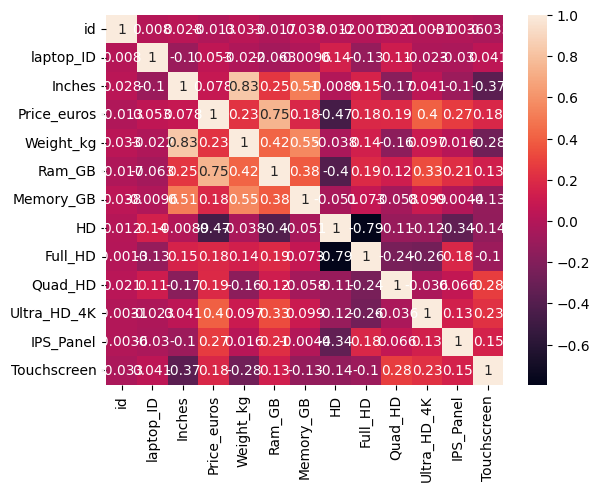

In [285]:
sns.heatmap(corr, annot=True);

In [271]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet,RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error

In [286]:
from sklearn import preprocessing

test_size = 0.20
random_seed = 42
RIDGE_alphas = np.logspace(-100, 100, 100)
LASSO_alphas = np.logspace(-100, 100, 100)
ELN_alphas = np.logspace(-100, 100, 100)


# Estandarización
std_scale= preprocessing.StandardScaler().fit(X)
X_train_std = std_scale.transform(X)
X_test_std  = std_scale.transform(X_test)


# Ajustes
models = {
    "Ridge" : RidgeCV(alphas=RIDGE_alphas, cv=5),
    "Lasso" : LassoCV(alphas=LASSO_alphas, cv=5, max_iter=1000),
    "ElasticNet" : ElasticNetCV(alphas=ELN_alphas, l1_ratio=1,cv=5, max_iter=1000),
}


results_test = []
results_train = []


for name, model in models.items():
    model.fit(X_train_std, y)
    y_pred_train = model.predict(X_train_std)
    mae_train = metrics.mean_absolute_error(y, model.predict(X_train_std))
    results_train.append({"Modelo": name, 
                    "MAE": mae_train})
    

    
    y_pred = model.predict(X_test_std)
    



perf_df = (pd.DataFrame(results_train)
           .sort_values("MAE")
           .reset_index(drop=True))
print("\n── PERFORMANCE (variables estandarizadas-ENTRENAMIENTO) ──")
print(perf_df.to_string(index=False))

c:\Users\Abelardo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.28353e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Abelardo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.70951e-32): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Abelardo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.28916e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Abelardo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.28353e-17): result may not be accurate.
  return 


── PERFORMANCE (variables estandarizadas-ENTRENAMIENTO) ──
    Modelo        MAE
     Ridge 217.645641
     Lasso 220.907685
ElasticNet 220.907685


In [287]:
# Seleccionamos el mejor
best_name  = perf_df.loc[0, "Modelo"]
best_model = models[best_name]
beta_std   = pd.Series(best_model.coef_, index=X.columns)
b0_std     = best_model.intercept_

print(f"\n► Mejor modelo: {best_name}")
print("Coeficientes (β_std):")
print(beta_std.round(3))
print(f"Intercepto (β₀_std): {b0_std:.3f}\n")


► Mejor modelo: Ridge
Coeficientes (β_std):
Weight_kg                                     97.426
Ram_GB                                       306.312
Full_HD                                       74.430
Quad_HD                                       85.430
Ultra_HD_4K                                  133.468
Segmento_de_uso_Consumo general              -93.886
Segmento_de_uso_Alto rendimiento / Gaming     43.553
Segmento_de_uso_Empresarial                  132.232
Segmento_de_uso_Otro / Indefinido            -66.873
OS_ChromeOS                                  -39.874
OS_MacOS                                      71.753
OS_Linux                                     -20.375
OS_No especificado                           -26.238
Company_Google                                22.108
Company_Acer                                  -4.380
Company_Asus                                   4.330
Company_Dell                                   3.181
Company_LG                                    40.371
C

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [292]:
modelos = {
    'ridge': Ridge(),
    'lasso': Lasso(),
    'elasticnet': ElasticNet(),
    'random_forest': RandomForestRegressor(random_state=42)
}

# Grid para hiperparámetros
param_grid = {
    'ridge': {'model__alpha': [0.1, 1.0, 10.0]},
    'lasso': {'model__alpha': [0.01, 0.1, 1.0]},
    'elasticnet': {'model__alpha': [0.01, 0.1, 1.0], 'model__l1_ratio': [0.1, 0.5, 0.9]},
    'random_forest': {'model__n_estimators': [50, 100], 'model__max_depth': [None, 5]}
}


# Estandarización
std_scale= preprocessing.StandardScaler().fit(X)
X_train_std = std_scale.transform(X)
std_scale_test= preprocessing.StandardScaler().fit(X_test)
X_test_std  = std_scale_test.transform(X_test)

In [293]:
resultados = {}
for nombre, modelo in modelos.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', modelo)
    ])
    
    print(f" Entrenando modelo: {nombre}")
    
    grid = GridSearchCV(pipe, param_grid[nombre], cv=10, scoring='neg_mean_squared_error')
    grid.fit(X_train_std, y)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_std)

    mae_train = mean_absolute_error(y, best_model.predict(X_train_std))
    print(f"✅ MAE_Train {nombre}: {mae_train:.2f} | Mejores hiperparámetros: {grid.best_params_}")

    pred_df = pd.DataFrame({
        'id': data_test.id.values,
        'Price_euros': y_pred
    }).sort_values('id')

    resultados[nombre] = pred_df

    # Guardar CSV
    pred_df.to_csv(f'CVpredicciones_{nombre}.csv', index=False)

 Entrenando modelo: ridge
✅ MAE_Train ridge: 217.32 | Mejores hiperparámetros: {'model__alpha': 10.0}
 Entrenando modelo: lasso


c:\Users\Abelardo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.807e+05, tolerance: 3.897e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Abelardo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.078e+05, tolerance: 4.304e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Abelardo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

✅ MAE_Train lasso: 217.45 | Mejores hiperparámetros: {'model__alpha': 1.0}
 Entrenando modelo: elasticnet


c:\Users\Abelardo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.435e+06, tolerance: 3.897e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Abelardo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.369e+06, tolerance: 4.304e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Abelardo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

✅ MAE_Train elasticnet: 217.17 | Mejores hiperparámetros: {'model__alpha': 1.0, 'model__l1_ratio': 0.9}
 Entrenando modelo: random_forest
✅ MAE_Train random_forest: 96.11 | Mejores hiperparámetros: {'model__max_depth': None, 'model__n_estimators': 100}


In [31]:
df = pd.read_csv("train.csv")
df
# Separar predictores y variable objetivo
X = df.drop(columns=['id', 'laptop_ID','Price_euros'])
y = df['Price_euros']

data_test = pd.read_csv("test.csv")
X_test = data_test.drop(columns=['id', 'laptop_ID'])


In [33]:
import numpy as np
import pandas as pd

# Importación de librerías de scikit-learn
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

# Importación de modelos de regresión
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

# =============================================================================
# 1. Carga de datos
# =============================================================================

# Supongamos que tus datos están en archivos CSV:
# "train.csv" contiene la variable target y las covariables
# "test.csv" contiene solo las covariables (sin target)

#train_df = X  # Asegúrate de que incluya la columna 'target'
#test_df = X_test    # Este DF no debe tener la columna 'target'

# Separar covariables y target en los datos de entrenamiento
X_train = X
y_train = y

# Datos de prueba: solo covariables
X_test = X_test

# =============================================================================
# 2. Definición de modelos y grids de hiperparámetros
# =============================================================================

# Diccionario con los 4 modelos a evaluar
models = {
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(objective="reg:squarederror", random_state=42, verbosity=0),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "LightGBM": lgb.LGBMRegressor(random_state=42,)
}

# Parámetros a buscar para cada modelo dentro del pipeline (el prefijo 'regressor__' es necesario)
param_grids = {
    "AdaBoost": {
        "regressor__n_estimators": [30,35, 150, 100, 200],
        "regressor__learning_rate": [0.01, 0.1, 1.0]
    },
    "XGBoost": {
        "regressor__n_estimators": [30,35, 150, 100, 200],
        "regressor__learning_rate": [0.01, 0.1, 0.2],
        "regressor__max_depth": [3, 5, 7]
    },
    "GradientBoosting": {
        "regressor__n_estimators": [30,35, 150, 100, 200],
        "regressor__learning_rate": [0.01, 0.1, 0.2],
        "regressor__max_depth": [3, 5, 7]
    },
    "LightGBM": {
        "regressor__n_estimators": [30, 35, 150, 100, 200],
        "regressor__learning_rate": [0.01, 0.1, 0.2],
        "regressor__max_depth": [3, 5, 7]
    }
}

# =============================================================================
# 3. Pipeline, búsqueda de hiperparámetros y validación cruzada
# =============================================================================

# Diccionarios para almacenar los resultados y los mejores modelos encontrados
results = {}
best_models = {}

# Para cada modelo, se crea un pipeline que primero estandariza los datos y luego ajusta el modelo.
# Se realiza una búsqueda de hiperparámetros usando GridSearchCV y la métrica "Mean Absolute Error" (MAE)
for name, model in models.items():
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("regressor", model)
    ])
    
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids[name],
        scoring="neg_mean_absolute_error",  # Se usa el negativo porque scikit‑learn maximiza la puntuación
        cv=5,
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    
    # Se almacena el mejor pipeline y el error obtenido en validación cruzada (convierte a positivo)
    best_models[name] = grid_search.best_estimator_
    results[name] = {
        "Best_Params": grid_search.best_params_,
        "CV_MAE": -grid_search.best_score_
    }
    print(f"{name} completado. MAE (CV): {-grid_search.best_score_:.4f}")

# Mostramos la comparación de modelos según el MAE obtenido en validación cruzada
results_df = pd.DataFrame(results).T
print("\nComparación de modelos (CV MAE):")
print(results_df)

# =============================================================================
# 4. Selección del mejor modelo y predicción en el conjunto de prueba
# =============================================================================

# Se selecciona el modelo con el menor MAE en validación cruzada
best_model_name = min(results, key=lambda name: results[name]["CV_MAE"])
best_model = best_models[best_model_name]
print(f"\nEl mejor modelo es: {best_model_name} con CV MAE: {results[best_model_name]['CV_MAE']:.4f}")

# Una vez seleccionado, se usan todos los datos de entrenamiento para ajustar (ya se hizo dentro de GridSearchCV)
# y se realiza la predicción sobre el conjunto de prueba
test_predictions = best_model.predict(X_test)

# Se pueden guardar las predicciones en un archivo CSV para su posterior análisis o entrega




AdaBoost completado. MAE (CV): 285.0003
XGBoost completado. MAE (CV): 199.3199
GradientBoosting completado. MAE (CV): 198.4238
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 912, number of used features: 28
[LightGBM] [Info] Start training from score 1108.122872
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

In [34]:
pred_df = pd.DataFrame({
        'id': data_test.id.values,
        'Price_euros': test_predictions
    }).sort_values('id')



    # Guardar CSV
pred_df.to_csv(f'Boostingx_predicciones_{best_model_name}.csv', index=False)


In [35]:
best_models

{'AdaBoost': Pipeline(steps=[('scaler', StandardScaler()),
                 ('regressor',
                  AdaBoostRegressor(learning_rate=0.01, n_estimators=35,
                                    random_state=42))]),
 'XGBoost': Pipeline(steps=[('scaler', StandardScaler()),
                 ('regressor',
                  XGBRegressor(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None